# Lesson 8 Class Exercises: Seaborn

## Get Started
Import the Numpy, Pandas, Matplotlib and Seaborn packages. Be sure to and the Jupyter notebook Matplotlib magic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exercise 1: Pairwise relationships

Load the `geyser` dataset from Seaborn. The `geyser` dataset contains wait times between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.  

In [94]:
geyser = sns.load_dataset('geyser')
geyser.head(5)

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


Use seaborn to create a plot that looks like the following:

<img src="media/D09-Geyser-pairplot.png" width="50%">

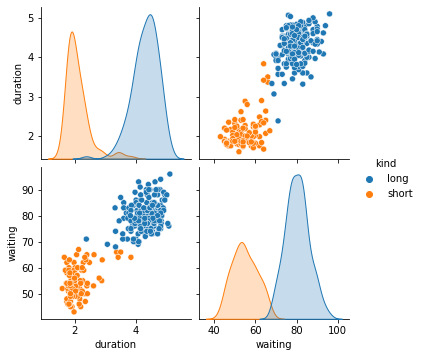

In [3]:
sns.pairplot(geyser,hue="kind")

Generate a plot that only shows the scatterplot of the "duration" and "waiting" variables. (Hint: use the `replot` function)

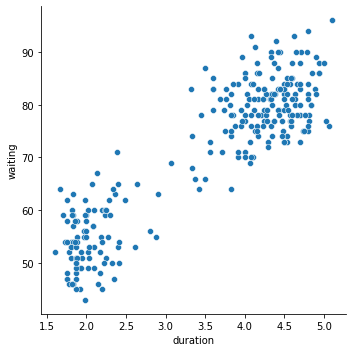

In [7]:
sns.relplot(x="duration", y="waiting", data=geyser)

Load the Seaborn `tips` data

In [57]:
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Generate a pairplot where points are colored by `sex`. Is there any correlation between 

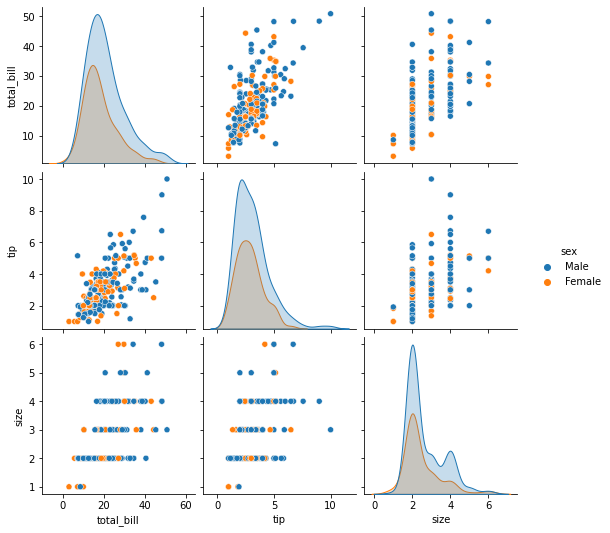

In [13]:
sns.pairplot(tips,hue="sex"); # use ; will remove the first time, terminate the line)

## Exercise 2: Line Plots

Load the Seaborn `frmi` dataset.  

In [20]:
fmri=sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


The following are brief explanations of the different columns.

- `region`:
    - `frontal`: the frontal lobes are important for voluntary movement, expressive language and for managing higher level executive functions
    - `parietal`: the parietal lobe processes sensory information for cognitive purposes and helps coordinate spatial relations.
- `event`:
    - `cue`: a pulse cue from an implanted electrode
    - `stim`:  a stimulus cue from an implated electrode

- `signal`: the numerical value for the MRI signal

Use the [sns.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html) function to generate a line graph that looks like the following:

<img src="./media/D09-fmri-lineplot.png" width="50%"> 

Hint: use the `hue` and `style` arguments

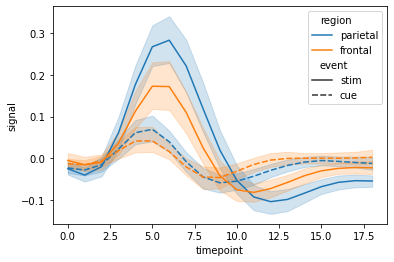

In [23]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event");

## Exercise 3: Boxplots
Generate a boxplot using the [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function where that compares the events between the two regions. It should look like the following:

<img src="media/D09-frmi-boxplot1.png" width="50%">

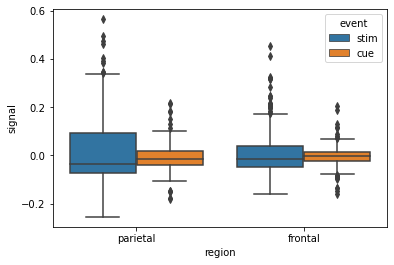

In [25]:
sns.boxplot(data=fmri,x="region", y="signal", hue="event" );

Next, create a new boxplot with a separate set of boxplots per time point. Create a separate plot for each region. The plots should look like the following:

<img src="media/D09-frmi-boxplot2.png" width="50%">
<img src="media/D09-frmi-boxplot3.png" width="50%">


In Seaborn, you add a title to a figure by using the `set_title()` function.  For example:

```python
plot = sns.boxplot(...)
plot.set_title('Title String');
```

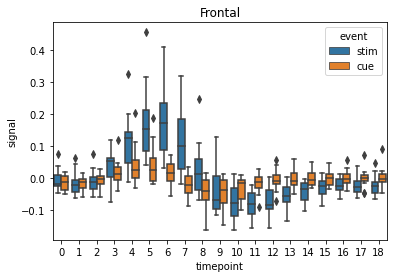

In [36]:
plot=sns.boxplot(data=fmri[fmri["region"]=="frontal"],x="timepoint", y="signal", hue="event").set_title("Frontal");

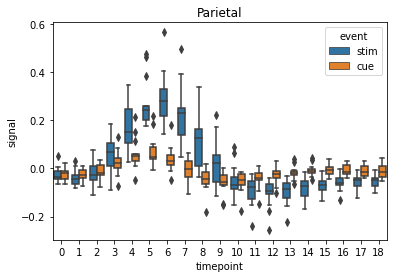

In [43]:
plot2=sns.boxplot(data=fmri[fmri["region"]=="parietal"],x="timepoint", y="signal", hue="event").set_title("Parietal");

#df = fmri.groupby("region")
#sns.boxplot(data=df, x="timepoint", y="signal", hue="event")

## Exercise 4: Violin Plots

Now let's recreate the frontal plot but insted of a box-and-wisker plot let's create a violin plot using the [sns.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function.  This plot will require more room.  So the default size will not look quite right.  We can expland the size of a plot by using Matplotlib functions. Remember that Seaborn uses Matplotlib behind the scenes so we can affect Seaborn plotting by using matplotlib functions. For example, to change a figure size to make it wider:

```python
fig, ax = plt.subplots(figsize=(10, 4))
```

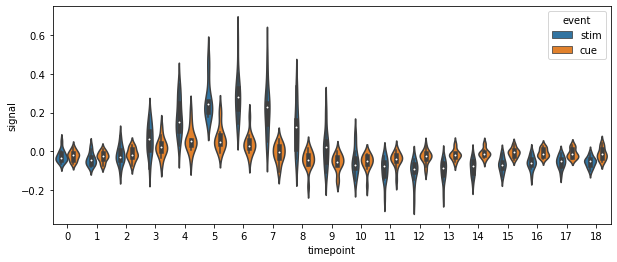

In [49]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(data=fmri[fmri["region"]=="parietal"],x="timepoint", y="signal", hue="event", ax=ax);

## Exercise 5: Density Plots

Using the the Seaborn `tips` dataset from Exercise #1 Use the [sns.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function to generate a density plot that compares the distribution of tip amounts between different party sizes

<AxesSubplot:xlabel='Density', ylabel='tip'>

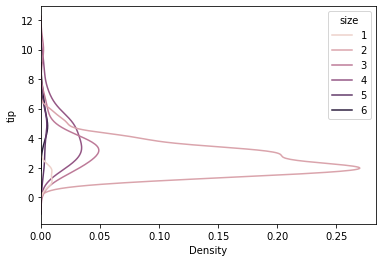

In [62]:
sns.kdeplot(data=tips, y="tip",hue="size" )

Now adjust the plot with the following:

- Color the area under each curve (hint: see the `fill` argument). 
- Make it so that there is transparency between overlapping curves so that you can still see all of them (hint: see the `alpha` argument)
- Scale each density plot so that the number of observations does not bias the size (hint: see the `common_norm` argument).
- Use a color palette that makes it easier to see the different distributions. Some matplotlib colors can be found [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

It should look similar to the following (although with the colors of your choice):

<img src="./media/D09-tips-kde1.png" width="50%">

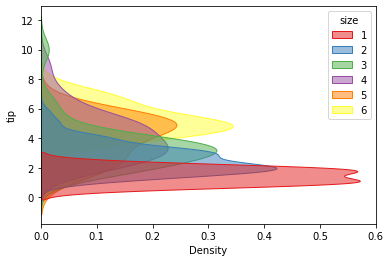

In [89]:
sns.kdeplot(data=tips, y="tip",hue="size",palette="Set1", fill=True, alpha=0.5, common_norm=False);

Using the geyser data from example 1, let's create a 2D density plot.  For the geyers data we have the `duration` of the eruption and the `waiting` time between eruptions. Let's see what the 2D density distribution looks like with `waiting` as the x-axis and `duration` as the y axis.  It should look like the following:

<img src="./media/D09-geyser-kde1.png" width="50%">

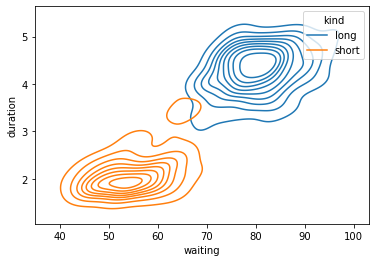

In [97]:
sns.kdeplot(data=geyser, x="waiting", y="duration", hue="kind");

Similar to the 1D density plots we can fill and color the dnesity plot.  Create a new plot that has the following:
- The eruption kind (e.g. long and short) is a different color
- The area within the curves is filled with color
- There is transparency so that overlapping regions can be seen.

The plot should look like the following:

<img src="./media/D09-geyser-kde2.png" width="50%">

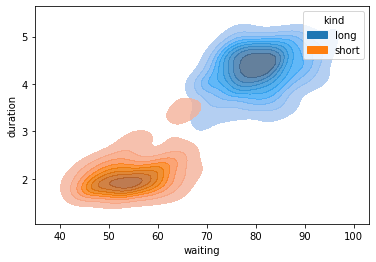

In [100]:
sns.kdeplot(data=geyser, x="waiting", y="duration", hue="kind", fill=True, alpha=0.8);

## Exercise 6: Heatmaps

Load the Seaborn `flights` dataset. 

In [104]:
flights=sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Pivot the table so that years are columns, the month is an index and the passengers are the cell values

In [ ]:
flight

In [105]:


from bokeh.io import output_notebook, show
output_notebook()

ModuleNotFoundError: No module named 'bokeh'

Now generate a heatmap using the [sns.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function showing the passengers 

In the heatmap above, the pattern of changes in passengers is easily seen because the columns and rows are ordered by month and year.  But somtimes when there is no clear way to organize data to observe a pattern we want to cluster gropus of observations that have similarity with others.  To do this we can use the [sns.clustermap()](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function.  To explore this plot, lets first load the Seaborn `iris` dataset.

Now call the `sns.clustermap()` function using only the numeric columns of the `iris` dataset